In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import sys
import os
# import plotly.express as px
# import plotly.graph_objects as go
import squarify
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path
from src.utils import visualization_utils

In [2]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_kingdom_class.csv")
df = pd.read_csv(file_path)
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,Code,Name,kingdom,LineageTaxIDs,Rank,FullLineage,FullLineageTaxIDs,FullLineageRanks,class
0,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
1,UniRef90_L0BZL1,11676,AFZ96186.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
2,UniRef90_D6NXI9,11676,ADF86161.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
3,UniRef90_A0A023HQ48,28875,AGO66969.1,['Homo sapiens'],Homo sapiens,Rotavirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
4,UniRef90_L0BZL4,11676,AFZ95585.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348396,UniRef90_A0A158WYC0,1803956,AJS09545.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348397,UniRef90_A0A158WZ44,1803956,AJS09547.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348398,UniRef90_A0A158WZ60,1803956,AJS09567.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348399,UniRef90_A0A158X2K2,1803956,AJS09541.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia


In [3]:
n = df.shape[0]
n

348401

In [2]:
def get_label(pct, threshold):
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

### Kingdoms

In [5]:
df["kingdom"] = df["kingdom"].fillna("Unknown")

In [6]:
kingdoms = list(df["kingdom"].unique())
print(kingdoms)

['Metazoa', 'Viridiplantae', 'Pseudomonadati', 'Bacillati', 'Fungi', 'Unknown', 'Methanobacteriati', 'Thermoproteati', 'Fusobacteriati', 'Thermotogati', 'Orthornavirae']


In [7]:
agg_df = df[["uniref90_id", "kingdom", "class"]].groupby(["kingdom", "class"]).count().reset_index().rename(columns={"uniref90_id": "count"})
agg_df

,kingdom,class,count
0,Bacillati,Actinomycetes,2111
1,Bacillati,Bacilli,6703
2,Bacillati,Clostridia,366
3,Bacillati,Cyanophyceae,3443
4,Bacillati,Erysipelotrichia,9
...,...,...,...
96,Viridiplantae,Mamiellophyceae,139
97,Viridiplantae,Pinopsida,17
98,Viridiplantae,Polypodiopsida,4
99,Viridiplantae,Trebouxiophyceae,1768


In [137]:
def get_data_for_pie_chart(df, col_name, n, threshold):
    count_data = df[col_name].value_counts().to_dict()

    label_data = {}
    prevalence_data = {}
    for k, v in count_data.items():
        prevalence = v/n*100
        prevalence_data[k] = f"{k} ({prevalence:.2f}%)"
        if prevalence <= threshold:
            prevalence_data[k] = f"{k} ({prevalence:.3f}%)"
            label_data[k] = ""
        else:
            label_data[k] = k
    return count_data, label_data, prevalence_data

In [121]:
kingdom_count_data, kingdom_label_data, kingdom_prevalence_data = get_data_for_pie_chart(df, "kingdom", n, threshold=0.5)

KeyError: 'kingdom'

In [10]:
kingdom_count_data

{'Metazoa': 280763,
 'Pseudomonadati': 29891,
 'Unknown': 13174,
 'Bacillati': 12657,
 'Viridiplantae': 9201,
 'Fungi': 1645,
 'Thermoproteati': 642,
 'Methanobacteriati': 233,
 'Thermotogati': 193,
 'Fusobacteriati': 1,
 'Orthornavirae': 1}

In [11]:
kingdom_label_data

{'Metazoa': 'Metazoa',
 'Pseudomonadati': 'Pseudomonadati',
 'Unknown': 'Unknown',
 'Bacillati': 'Bacillati',
 'Viridiplantae': 'Viridiplantae',
 'Fungi': '',
 'Thermoproteati': '',
 'Methanobacteriati': '',
 'Thermotogati': '',
 'Fusobacteriati': '',
 'Orthornavirae': ''}

In [12]:
kingdom_prevalence_data

{'Metazoa': 'Metazoa (80.59%)',
 'Pseudomonadati': 'Pseudomonadati (8.58%)',
 'Unknown': 'Unknown (3.78%)',
 'Bacillati': 'Bacillati (3.63%)',
 'Viridiplantae': 'Viridiplantae (2.64%)',
 'Fungi': 'Fungi (0.472%)',
 'Thermoproteati': 'Thermoproteati (0.184%)',
 'Methanobacteriati': 'Methanobacteriati (0.067%)',
 'Thermotogati': 'Thermotogati (0.055%)',
 'Fusobacteriati': 'Fusobacteriati (0.000%)',
 'Orthornavirae': 'Orthornavirae (0.000%)'}

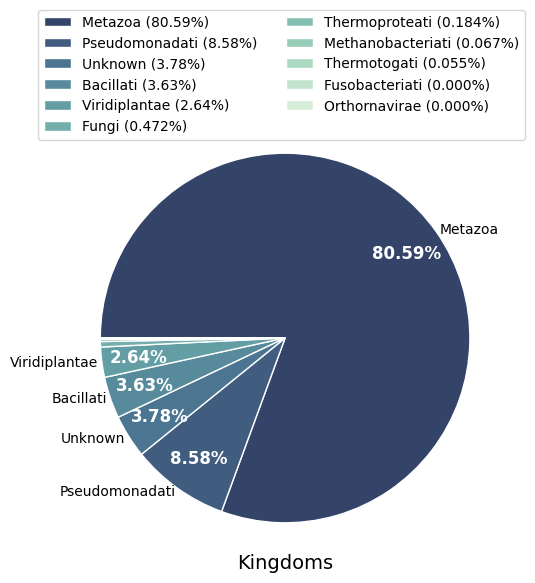

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

threshold=0.5
wedges, texts, autotexts = ax.pie(kingdom_count_data.values(), labels=list(kingdom_label_data.values()), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(kingdom_label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, kingdom_prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Kingdoms", fontsize=14, y=0, pad=0)
plt.show()


### Classes

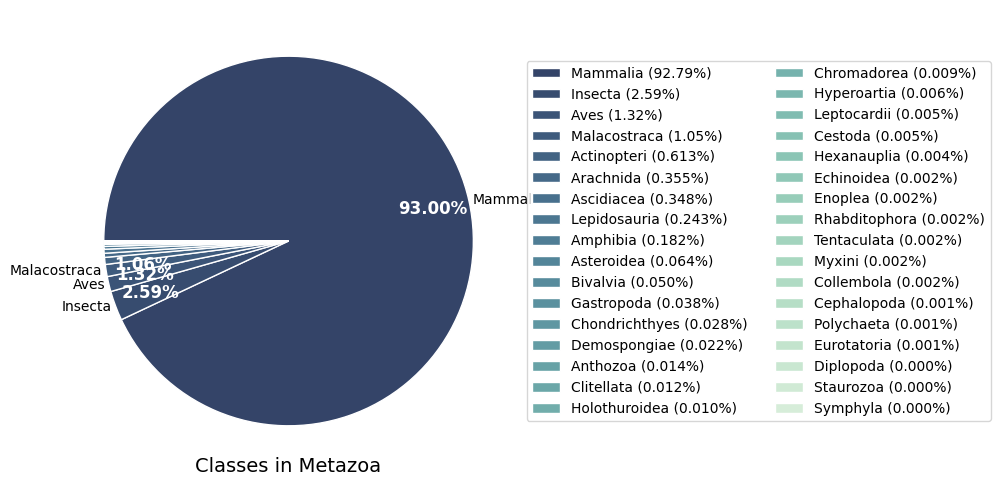

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
threshold=1.0
metazoa_df = df[df["kingdom"] == "Metazoa"]
n_metazoa = metazoa_df.shape[0]

count_data, label_data, prevalence_data = get_data_for_pie_chart(metazoa_df, "class", n_metazoa, threshold=threshold)

wedges, texts, autotexts = ax.pie(count_data.values(), labels=list(label_data.values()), autopct=lambda pct: get_label(pct, threshold=threshold), 
                              pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                              colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(label_data), reverse=True,), 
                              wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0.5), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")

ax.set_title("Classes in Metazoa", fontsize=14, y=0, pad=0)
plt.show()

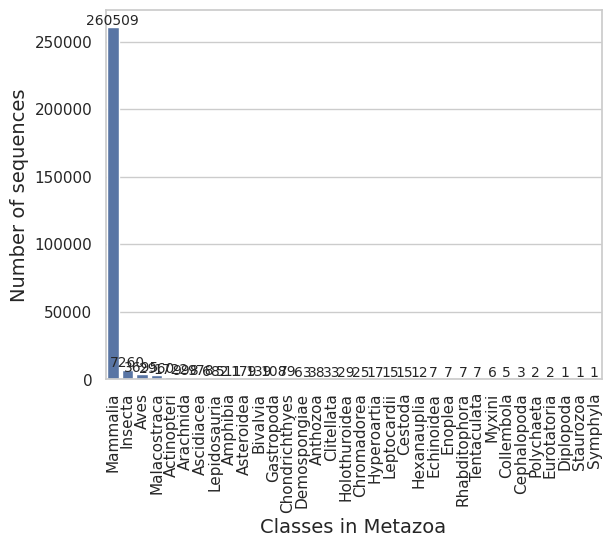

In [15]:
plt.clf()
plt.rcParams["figure.figsize"]=(20,6)
#fig, ax = plt.subplots(figsize=(12, 6))
count_data, label_data, prevalence_data = get_data_for_pie_chart(metazoa_df, "class", n_metazoa, threshold=threshold)

sns.set_theme()
sns.set_style("whitegrid")
ax = sns.barplot(count_data)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel("Classes in Metazoa", fontsize=14)
ax.set_ylabel("Number of sequences", fontsize=14)
plt.xticks(rotation=90)
plt.show()

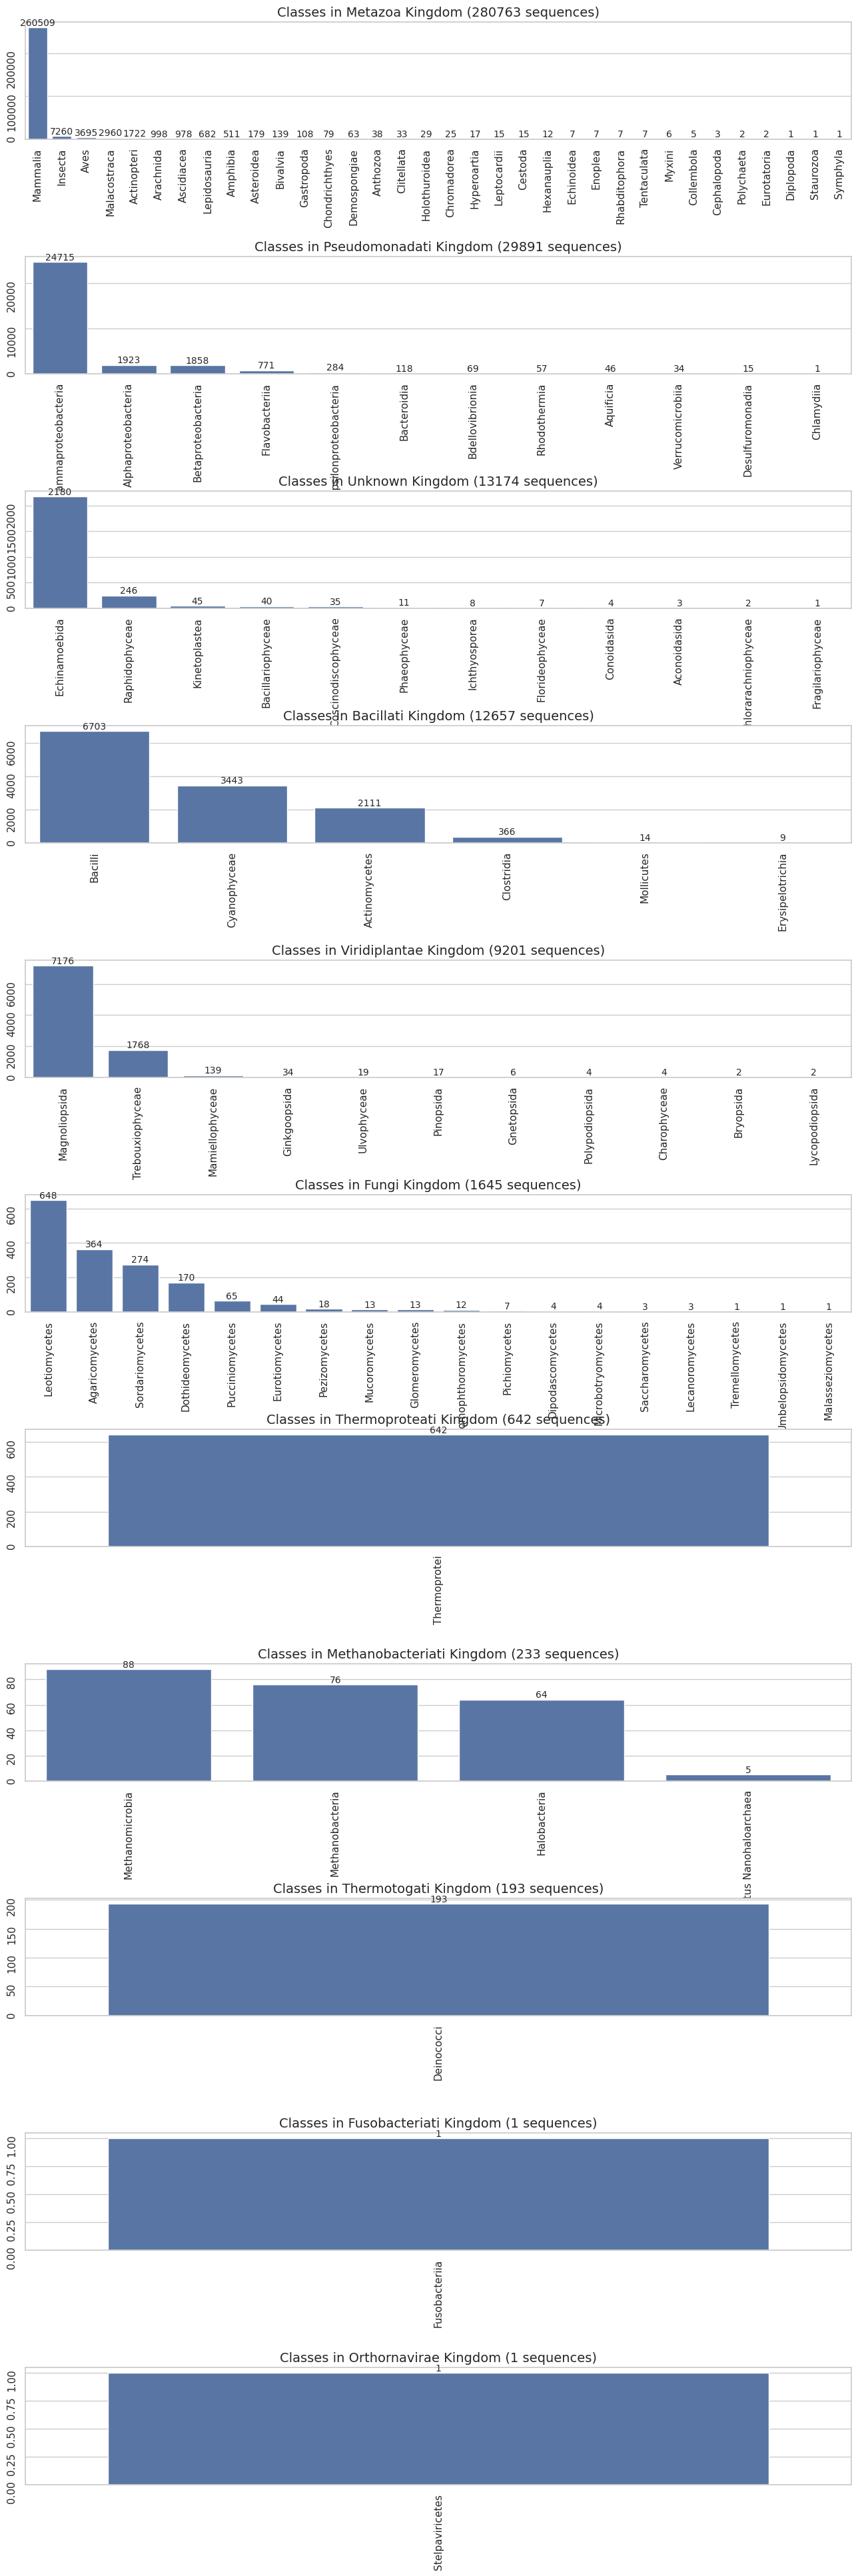

In [16]:
n_kingdoms = len(kingdom_count_data)
fig, axs = plt.subplots(nrows=n_kingdoms, ncols=1, figsize=(16,48))
plt.subplots_adjust(hspace=1)
axs = axs.flatten()
i = 0
for kingdom, kingdom_count in kingdom_count_data.items():
    if i == n_kingdoms:
        break
    ax = axs[i]
    
    kingdom_df = df[df["kingdom"] == kingdom]
    n_kingdom = kingdom_df.shape[0]

    count_data, _, _ = get_data_for_pie_chart(kingdom_df, "class", n_kingdom, threshold=1.0)
    
    sns.barplot(count_data, ax=ax)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_title(f"Classes in {kingdom} Kingdom ({kingdom_count} sequences)", fontsize=14)
    ax.set_ylabel("", fontsize=0)
    ax.tick_params(labelrotation=90)
    i += 1

plt.show()


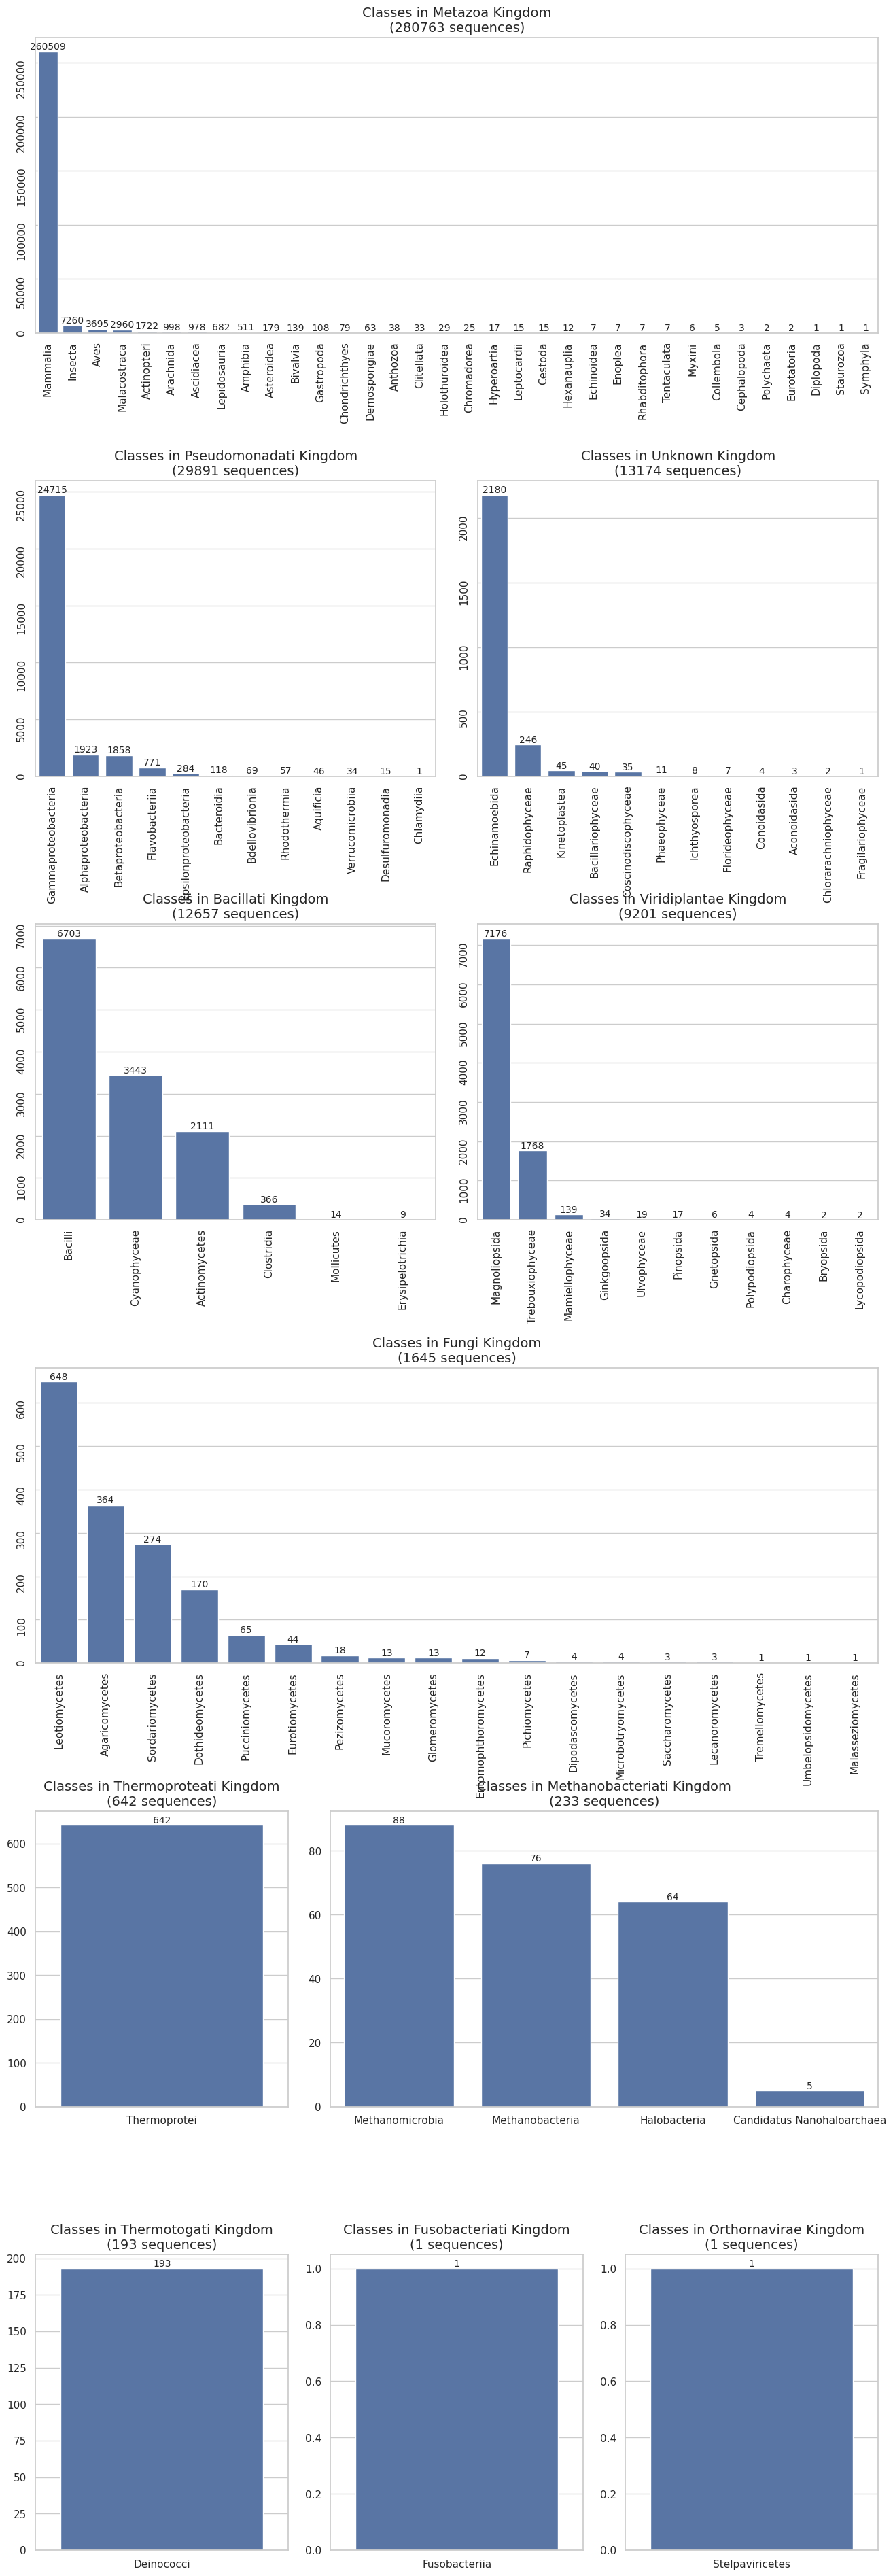

In [17]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(16,48))

gs = GridSpec(6, 6, wspace=.4,  hspace=.5)
n_kingdoms = len(kingdoms)

axs = []
axs.append(fig.add_subplot(gs[0, :]))
axs.append(fig.add_subplot(gs[1, 0:3]))
axs.append(fig.add_subplot(gs[1, 3:]))
axs.append(fig.add_subplot(gs[2, 0:3]))
axs.append(fig.add_subplot(gs[2, 3:]))
axs.append(fig.add_subplot(gs[3, :]))
axs.append(fig.add_subplot(gs[4, 0:2]))
axs.append(fig.add_subplot(gs[4, 2:]))
axs.append(fig.add_subplot(gs[5, 0:2]))
axs.append(fig.add_subplot(gs[5, 2:4]))
axs.append(fig.add_subplot(gs[5, 4:]))

i = 0
for kingdom, kingdom_count in kingdom_count_data.items():
    if i == n_kingdoms:
        break
    ax = axs[i]
    
    kingdom_df = df[df["kingdom"] == kingdom]
    n_kingdom = kingdom_df.shape[0]

    count_data, _, _ = get_data_for_pie_chart(kingdom_df, "class", n_kingdom, threshold=1.0)
    
    sns.barplot(count_data, ax=ax)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_title(f"Classes in {kingdom} Kingdom\n({kingdom_count} sequences)", fontsize=14)
    ax.set_ylabel("", fontsize=0)

    if len(count_data) > 4:
        ax.tick_params(labelrotation=90)
    i += 1

plt.show()

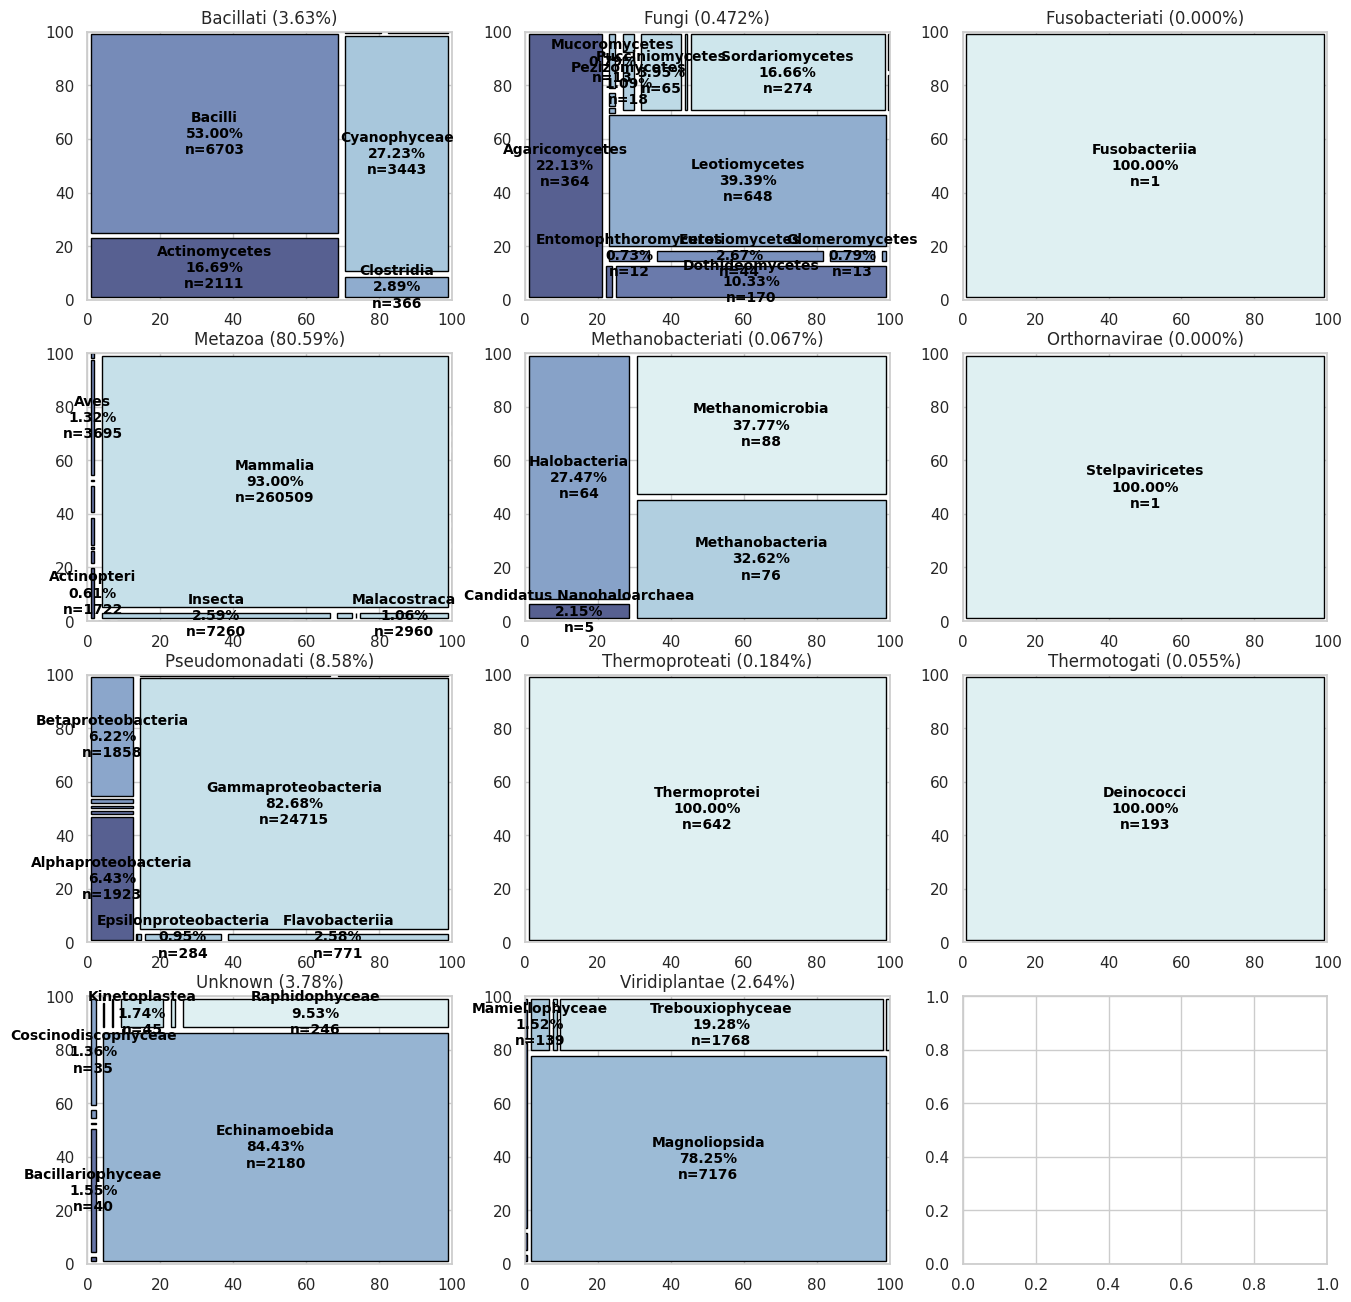

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

i = 0
for kingdom in agg_df["kingdom"].unique():
    if i == 11:
        break
    ax = axs.flatten()[i]
    sub_df = agg_df[agg_df["kingdom"] == kingdom]
    n = sub_df["count"].sum()
    labels = []
    for class_val, count in zip(sub_df["class"], sub_df["count"]):
        prevalence = count/n*100
        if prevalence <= 0.5:
            labels.append("")
        else:
            labels.append(f"{class_val}\n{prevalence:.2f}%\nn={count}")

    squarify.plot(
        sizes=sub_df["count"],
        label=labels,
        text_kwargs={
            "color": "black",
            "fontsize": 10,
            "fontweight": "bold"
        },
        pad=True,
        ec="black",
        color=sns.cubehelix_palette(rot=-.2, gamma=.5, reverse=True, n_colors=len(labels)),
        ax=ax
    )
    ax.set_title(kingdom_prevalence_data[kingdom])
    i += 1
plt.show()

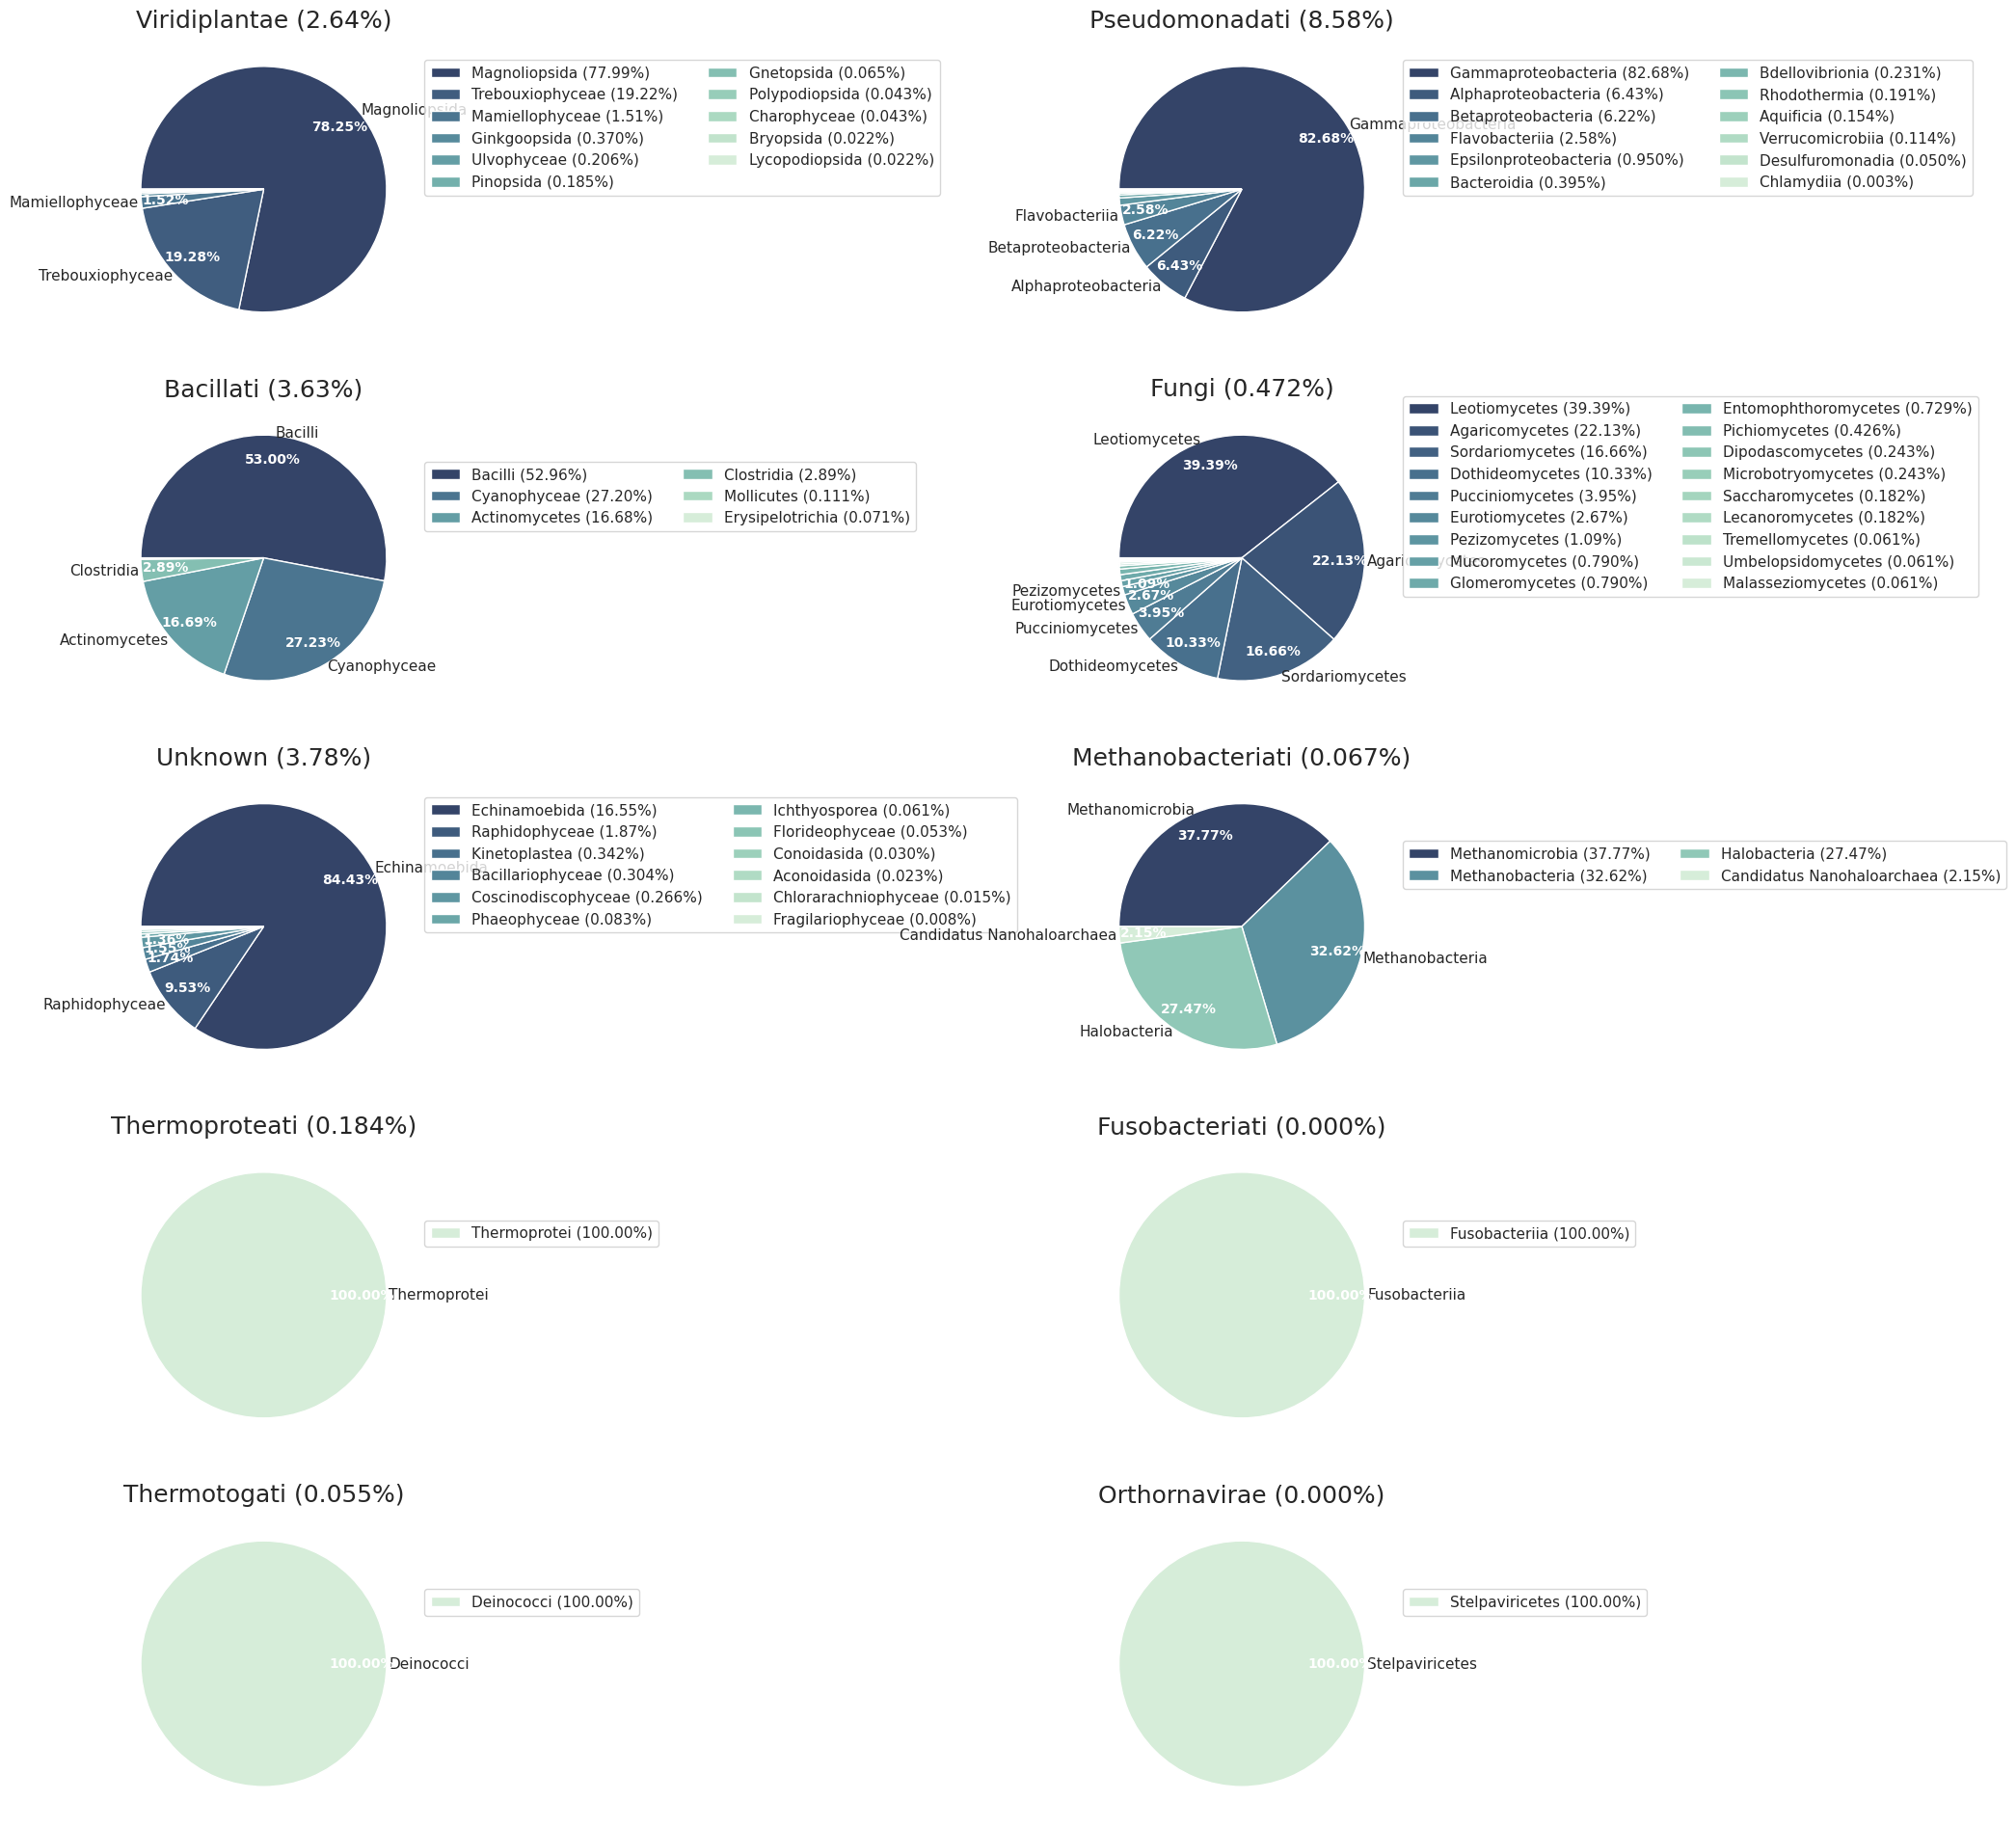

In [19]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24,24))
threshold=1.0
i = 0
n_kingdoms = len(kingdoms)
for kingdom in kingdoms:
    if kingdom in ["Metazoa"]:
        continue
    if i == n_kingdoms:
        break
    ax = axs.flatten()[i]
    
    kingdom_df = df[df["kingdom"] == kingdom]
    n_kingdom = kingdom_df.shape[0]

    count_data, label_data, prevalence_data = get_data_for_pie_chart(kingdom_df, "class", n_kingdom, threshold=1.0)
    
    wedges, texts, autotexts = ax.pie(count_data.values(), labels=list(label_data.values()), autopct=lambda pct: get_label(pct, threshold=1.0), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(label_data), reverse=True,), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})
    
    ax.legend(wedges, prevalence_data.values(),
              title="",
              loc="center left",
              bbox_to_anchor=(1, .7), ncol=2)
    plt.setp(autotexts, size=10, weight="bold", color="white")
    i += 1
    ax.set_title(kingdom_prevalence_data[kingdom], fontsize=18)

plt.show()

## Virus Composition

### IV Dataset

In [106]:
df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv"))
n = df.shape[0]
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEELLRVVRIIKQIYQSNPPPNPEGTRQARRNRRRRWR...,116
1,UniRef90_L0BZL1,11676,AFZ96186.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,EXEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKRTQ...,199
2,UniRef90_D6NXI9,11676,ADF86161.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEXLLRTIRLIRILYQSNPPPSSKGTRQARRNRRRRWR...,94
3,UniRef90_L0BZL4,11676,AFZ95585.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,377
4,UniRef90_D6NXJ0,11676,ADF86162.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEXLLXTXRLIRXLYQSNPPPNPEGTRQARRNRRRRWR...,116
...,...,...,...,...,...,...,...,...,...,...,...
220063,UniRef90_A0A158V297,11676,AHY02063.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVSIKIGGQVKEALLDTGADDTVLEEMNLPGKWKPKM...,341
220064,UniRef90_A0A158V2A8,11676,AHY02073.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,341
220065,UniRef90_A0A158V2B2,11676,AHY02083.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEEMSLPGKWKPKM...,341
220066,UniRef90_A0A158V2B7,11676,AHY02093.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEDMXLPGRWKPKM...,341


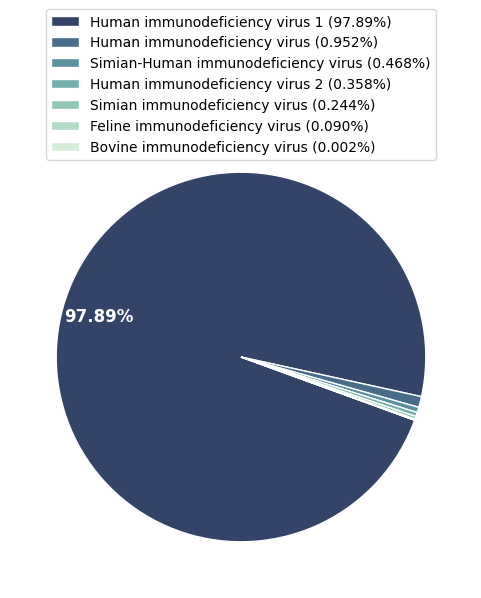

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))


count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=df.shape[0], threshold=1.0)
threshold=1.0
wedges, texts, autotexts = ax.pie(count_data.values(), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, labeldistance=0, counterclock=False, startangle=-20,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center",
          bbox_to_anchor=(.5, 1.09), ncol=1)
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=12, weight="bold", color="white")
#ax.set_title("IV Dataset", fontsize=14, y=0, pad=0)
plt.show()

#### Virus Composition

In [130]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=df.shape[0], threshold=0.01)
prevalence_data

{'Human immunodeficiency virus 1': 'Human immunodeficiency virus 1\n(97.89%)',
 'Human immunodeficiency virus': 'Human immunodeficiency virus\n(0.95%)',
 'Simian-Human immunodeficiency virus': 'Simian-Human immunodeficiency virus\n(0.47%)',
 'Human immunodeficiency virus 2': 'Human immunodeficiency virus 2\n(0.36%)',
 'Simian immunodeficiency virus': 'Simian immunodeficiency virus\n(0.24%)',
 'Feline immunodeficiency virus': 'Feline immunodeficiency virus\n(0.09%)',
 'Bovine immunodeficiency virus': 'Bovine immunodeficiency virus\n(0.002%)'}

In [131]:
count_data.pop("Human immunodeficiency virus 1")

215415

In [132]:
count_data

{'Human immunodeficiency virus': 2095,
 'Simian-Human immunodeficiency virus': 1030,
 'Human immunodeficiency virus 2': 788,
 'Simian immunodeficiency virus': 538,
 'Feline immunodeficiency virus': 198,
 'Bovine immunodeficiency virus': 4}

4653
Human immunodeficiency virus > 2095 > 0.45024715237481194
Simian-Human immunodeficiency virus > 1030 > 0.22136256178809371
Human immunodeficiency virus 2 > 788 > 0.16935310552331828
Simian immunodeficiency virus > 538 > 0.11562432839028584
Feline immunodeficiency virus > 198 > 0.0425531914893617
Bovine immunodeficiency virus > 4 > 0.0008596604341285192


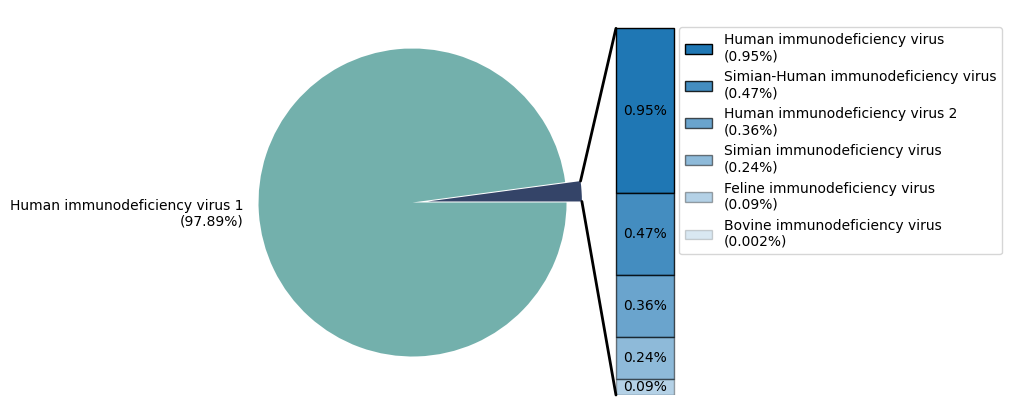

In [136]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=-.5)

# pie chart parameters
pie_values = [df[df['virus_name'] != "Human immunodeficiency virus 1"].shape[0], df[df['virus_name'] == "Human immunodeficiency virus 1"].shape[0]]
pie_labels = ['', prevalence_data["Human immunodeficiency virus 1"]]
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(pie_values, startangle=0,
                     labels=pie_labels, explode=explode, colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(pie_labels)+1, reverse=True))

# bar chart parameters
bar_values = [i for i in reversed(count_data.values())]
bar_labels = [i for i in reversed(count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    print(f"{label} > {val} > {height}")
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=prevalence_data[label], edgecolor="black",
                 alpha=1-(1/len(bar_labels) * j))
    label_pct = val/n*100
    if label_pct > 0.01:
        ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center')

ax2.legend(loc="center",
          bbox_to_anchor=(.92, .66))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/iv_viruses_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

#### Virus Host Composition

In [138]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=.01)
others_hosts = []
for k,v in count_data.items():
    if (v/n*100) <= 0.011:
        others_hosts.append(k)
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Others ({len(others_hosts)} hosts)")

count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)

In [139]:
prevalence_data

{'Homo sapiens': 'Homo sapiens (99.35%)',
 'Macaca mulatta': 'Macaca mulatta (0.39%)',
 'Felis catus': 'Felis catus (0.06%)',
 'Cercocebus atys': 'Cercocebus atys (0.06%)'}

In [140]:
n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
prevalence_data["Hosts with prevalence <= 0.011%"] = f"Hosts with prevalence <= 0.01%\n{len(others_hosts)} hosts ({n_others/n*100:.2f}%)"

In [141]:
prevalence_data

{'Homo sapiens': 'Homo sapiens (99.35%)',
 'Macaca mulatta': 'Macaca mulatta (0.39%)',
 'Felis catus': 'Felis catus (0.06%)',
 'Cercocebus atys': 'Cercocebus atys (0.06%)',
 'Hosts with prevalence <= 0.011%': 'Hosts with prevalence <= 0.01%\n36 hosts (0.15%)'}

In [142]:
count_data

{'Homo sapiens': 218631,
 'Macaca mulatta': 849,
 'Felis catus': 143,
 'Cercocebus atys': 122}

In [143]:
count_data["Hosts with prevalence <= 0.011%"] = n_others

In [144]:
count_data.pop("Homo sapiens")

218631

In [145]:
count_data

{'Macaca mulatta': 849,
 'Felis catus': 143,
 'Cercocebus atys': 122,
 'Hosts with prevalence <= 0.011%': 323}

1437


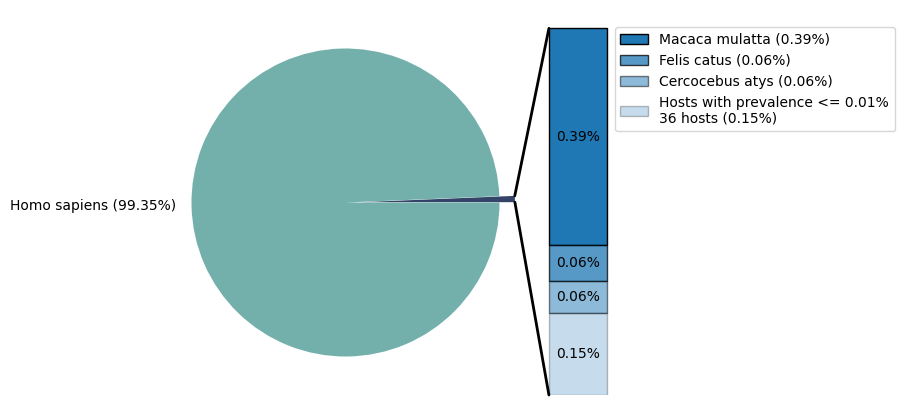

In [146]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=-.5)

# pie chart parameters
pie_values = [df[df['virus_host_name'] != "Homo sapiens"].shape[0], df[df['virus_host_name'] == "Homo sapiens"].shape[0]]
pie_labels = ['', prevalence_data["Homo sapiens"]]
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(pie_values, startangle=0,
                     labels=pie_labels, explode=explode, colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(pie_labels)+1, reverse=True))

# bar chart parameters
bar_values = [i for i in reversed(count_data.values())]
bar_labels = [i for i in reversed(count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=prevalence_data[label], edgecolor="black",
                 alpha=1-(1/len(bar_labels) * j))
    ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center')

ax2.legend(loc="center",
          bbox_to_anchor=(.88, .82))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/iv_hosts_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

### Non-IV Dataset

In [147]:
df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv"))
n = df.shape[0]
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023HQ48,28875,AGO66969.1,['Homo sapiens'],Homo sapiens,Rotavirus A,species,9606,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
1,UniRef90_A0A291S408,147712,ATL74331.1,['Homo sapiens'],Homo sapiens,Rhinovirus B,species,9606,species,ATLPTVPSDNVETRTTYMHYDGTETSLESFLGRAACVHVTTIENKL...,110
2,UniRef90_Q8B3A4,3052493,CAD44491.1,['Clethrionomys glareolus'],Clethrionomys glareolus,Orthohantavirus puumalaense,species,447135,species,VEFLKRNKVYFMNRQDVLDKNHVADIDKLIDYAASGDPTSPEDIES...,87
3,UniRef90_Q8B3J5,37741,CAD20665.1,['Rattus rattus'],Rattus rattus,Hantavirus sp.,species,10117,species,EPTGQTADWLTIIIYLTSFVIPIILKALYMLTTRGRQTTKDNKGMR...,194
4,UniRef90_A0A7M1VN82,2732655,QOS14274.1,['Homo sapiens; male'],Homo sapiens,Vientovirus,species,9606,species,MSLHLDCVNLLLTYNDPVRKDLWGYEPLRPTNYLRISKSMNNIRRC...,348
...,...,...,...,...,...,...,...,...,...,...,...
47787,UniRef90_A0A158WY96,1803956,AJS09554.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,NSSSPNKVHCIVQGRLGDDAKFFCPTGSLVSFQNSWGSQMDLTDPL...,194
47788,UniRef90_A0A158WYC0,1803956,AJS09545.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,LTSAQDEGPLGGEKPNYFLNFRAINVDIFTVSHTKVDNIFGRAWFS...,116
47789,UniRef90_A0A158WZ44,1803956,AJS09547.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,SSSPSSVHCIVQGRLGDDAKFFCPAGSIVTFQNSWGSQMDLTDPLC...,196
47790,UniRef90_A0A158WZ60,1803956,AJS09567.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,NGNLWRSQLTFPKQGHGMLSQFFAYFTGELNIHILYMASSGFLRVA...,207


#### Virus Composition

In [148]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=n, threshold=.01)
others_viruses = []
for k,v in count_data.items():
    if (v/n*100) <= 1.0:
        others_viruses.append(k)
        
df["virus_name_mod"] = df["virus_name"].apply(lambda x: x if x not in others_viruses else f"Others ({len(others_viruses)} viruses)")

count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_name"].isin(others_viruses)], col_name="virus_name_mod", n=n, threshold=0.01)

In [149]:
prevalence_data

{'Hepacivirus hominis': 'Hepacivirus hominis (22.91%)',
 'Hepatitis B virus': 'Hepatitis B virus (21.24%)',
 'Human papillomavirus': 'Human papillomavirus (2.26%)',
 'Rotavirus A': 'Rotavirus A (1.57%)',
 'Riboviria sp.': 'Riboviria sp. (1.18%)',
 'Marmot picobirnavirus': 'Marmot picobirnavirus (1.11%)'}

In [150]:
n_others = df[df['virus_name'].isin(others_viruses)].shape[0]
prevalence_data["Viruses with prevalence <= 1%"] = f"Viruses with prevalence <= 1%\n{len(others_viruses)} viruses ({n_others/n*100:.2f}%)"
prevalence_data

{'Hepacivirus hominis': 'Hepacivirus hominis (22.91%)',
 'Hepatitis B virus': 'Hepatitis B virus (21.24%)',
 'Human papillomavirus': 'Human papillomavirus (2.26%)',
 'Rotavirus A': 'Rotavirus A (1.57%)',
 'Riboviria sp.': 'Riboviria sp. (1.18%)',
 'Marmot picobirnavirus': 'Marmot picobirnavirus (1.11%)',
 'Viruses with prevalence <= 1%': 'Viruses with prevalence <= 1%\n3766 viruses (49.74%)'}

In [151]:
count_data

{'Hepacivirus hominis': 10947,
 'Hepatitis B virus': 10152,
 'Human papillomavirus': 1078,
 'Rotavirus A': 749,
 'Riboviria sp.': 563,
 'Marmot picobirnavirus': 529}

In [152]:
count_data["Viruses with prevalence <= 1%"] = n_others
count_data

{'Hepacivirus hominis': 10947,
 'Hepatitis B virus': 10152,
 'Human papillomavirus': 1078,
 'Rotavirus A': 749,
 'Riboviria sp.': 563,
 'Marmot picobirnavirus': 529,
 'Viruses with prevalence <= 1%': 23774}

47792


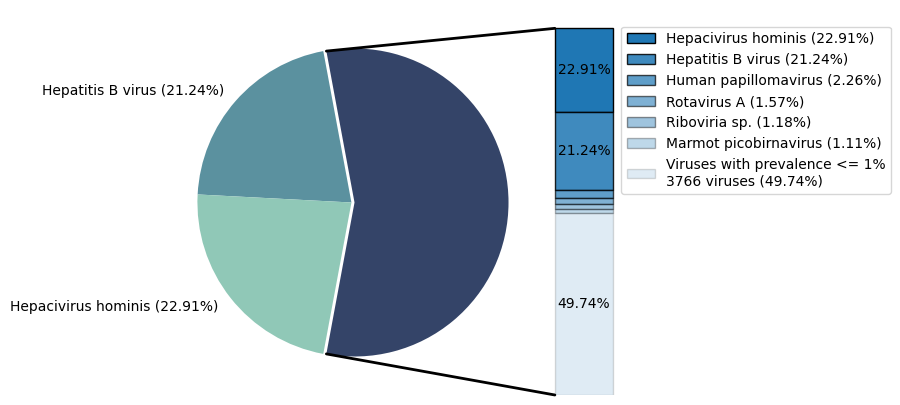

In [158]:
from matplotlib.patches import ConnectionPatch

selected_viruses = ["Hepacivirus hominis", "Hepatitis B virus"]

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=-.5)

# pie chart parameters
pie_values = [df[~df['virus_name'].isin(selected_viruses)].shape[0],
              df[df['virus_name'] == "Hepatitis B virus"].shape[0], 
              df[df['virus_name'] == "Hepacivirus hominis"].shape[0]]
pie_labels = ['', prevalence_data["Hepatitis B virus"], prevalence_data["Hepacivirus hominis"]]
explode = [0.02, 0, 0]

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(pie_values, startangle=-180 * pie_values[0]/n,
                     labels=pie_labels, explode=explode, colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(pie_labels)+1, reverse=True))

# bar chart parameters
bar_values = [i for i in reversed(count_data.values())]
bar_labels = [i for i in reversed(count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=prevalence_data[label], edgecolor="black", 
                 alpha=1-(1/len(bar_labels) * j))
    label_pct = val/n*100
    if label_pct > 2.5:
        ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center')

ax2.legend(loc="center",
          bbox_to_anchor=(.87, .74))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/noniv_viruses_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

#### Virus Host Composition

In [159]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=1)
others_hosts = []
for k,v in count_data.items():
    if (v/n*100) <= 1.0:
        others_hosts.append(k)
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Rare ({len(others_hosts)} hosts)")

count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)
prevalence_data

{'Homo sapiens': 'Homo sapiens (60.22%)',
 'Sus scrofa': 'Sus scrofa (2.69%)',
 'Hydrochoerus hydrochaeris': 'Hydrochoerus hydrochaeris (1.31%)',
 'Marmota himalayana': 'Marmota himalayana (1.13%)',
 'Gallus gallus': 'Gallus gallus (1.01%)'}

In [160]:
n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
prevalence_data["Hosts with prevalence <= 1%"] = f"Hosts with prevalence <= 1% (Rare hosts)\n({n_others/n*100:.2f}%)"
prevalence_data

{'Homo sapiens': 'Homo sapiens (60.22%)',
 'Sus scrofa': 'Sus scrofa (2.69%)',
 'Hydrochoerus hydrochaeris': 'Hydrochoerus hydrochaeris (1.31%)',
 'Marmota himalayana': 'Marmota himalayana (1.13%)',
 'Gallus gallus': 'Gallus gallus (1.01%)',
 'Hosts with prevalence <= 1%': 'Hosts with prevalence <= 1% (Rare hosts)\n(33.63%)'}

In [161]:
count_data

{'Homo sapiens': 28782,
 'Sus scrofa': 1286,
 'Hydrochoerus hydrochaeris': 627,
 'Marmota himalayana': 539,
 'Gallus gallus': 484}

In [162]:
count_data["Hosts with prevalence <= 1%"] = n_others
count_data

{'Homo sapiens': 28782,
 'Sus scrofa': 1286,
 'Hydrochoerus hydrochaeris': 627,
 'Marmota himalayana': 539,
 'Gallus gallus': 484,
 'Hosts with prevalence <= 1%': 16074}

60.22346615791321
2.690826915204525
1.311935018748045
1.1278037913143635
1.0127217508852482
33.633244037628174


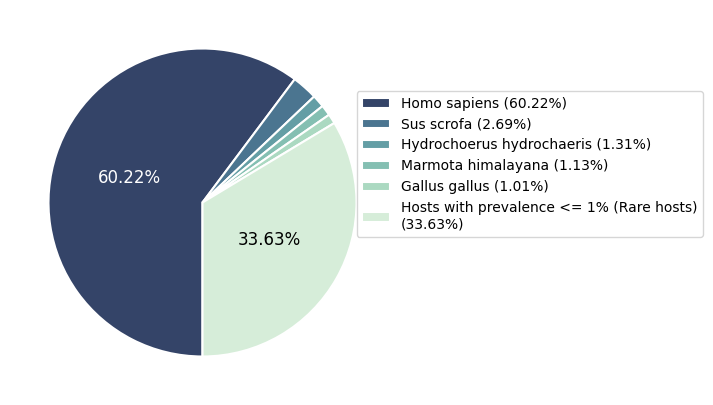

In [163]:
fig, ax = plt.subplots(figsize=(9, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.5, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(count_data), reverse=True), 
                                  wedgeprops={"linewidth": 1.5, "edgecolor": "white"})

ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center",
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=12, color="black")
plt.setp(autotexts[0], size=12, color="white")
plt.setp(autotexts[-1], size=12, color="black")
#ax.set_title("IV Dataset", fontsize=14, y=0, pad=0)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/noniv_hosts_pie.pdf"), bbox_inches="tight", dpi=600)
plt.show()

## Sequence Length Distribution

In [ ]:
def seq_length_analysis(input_file_path, output_file_path):
    df = pd.read_csv(input_file_path)
    df["seq_len"] = df["seq"].apply(lambda x: len(x))
    print(f"min = {df['seq_len'].min()}")
    print(f"max = {df['seq_len'].max()}")

    plt.clf()
    sns.set_theme()
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(df["seq_len"].values, bins=400, ax=ax, fill=True, alpha=1, kde=False, color=sns.color_palette("dark")[0])
    sns.rugplot(data=df, x="seq_len", height=-.03, clip_on=False, color="black", alpha=.5)
    ax.set_xlabel("Sequence Length", fontsize=12)
    ax.set_ylabel("Number of sequences", fontsize=12)
    ax.set_xticks(np.arange(0, df["seq_len"].max() + 1, 1000))
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_xlim((0, df["seq_len"].max() + 10))
    plt.savefig(output_file_path, bbox_inches="tight", dpi=600)
    plt.show()

### Pretraining Dataset

In [ ]:
seq_length_analysis(os.path.join(os.getcwd(), "..", "..", "..", "..", "input/data/uniref90/20240131/uniref90_viridae.csv"),
                    os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/pretrain_dataset_seqlength_dist.png"))

### Finetuning Dataset

In [ ]:
seq_length_analysis(os.path.join(os.getcwd(), "..", "..", "..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv"),
                    os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/finetune_dataset_seqlength_dist.png"))